In [0]:
# importing packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix , accuracy_score, f1_score , precision_score , recall_score

In [2]:
# Load Dataset
df = pd.read_csv('http://devanshushukla.com/hackveda.in/videos/PythonDataSets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Data Exploration
# shape
print ('This data frame has {} rows and {} columns.'.format(df.shape[0],
                                                            df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [4]:
# columns
print (df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
# info()
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
# check for missing values
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [7]:
# Fraud vs Normal Transactions
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print ('There were {} non-fraudulent transactions ({:.3f}%) and  {} fraudulant transactions ({:.3f}%).'.format(normal,perc_normal,fraudulent,perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and  492 fraudulant transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

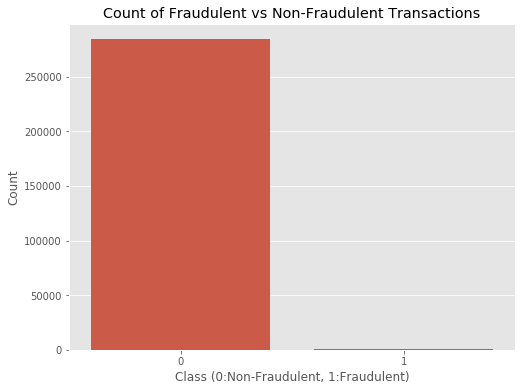

In [8]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index,y=counts)
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Text(0.5, 1, 'Heatmap of Correlation')

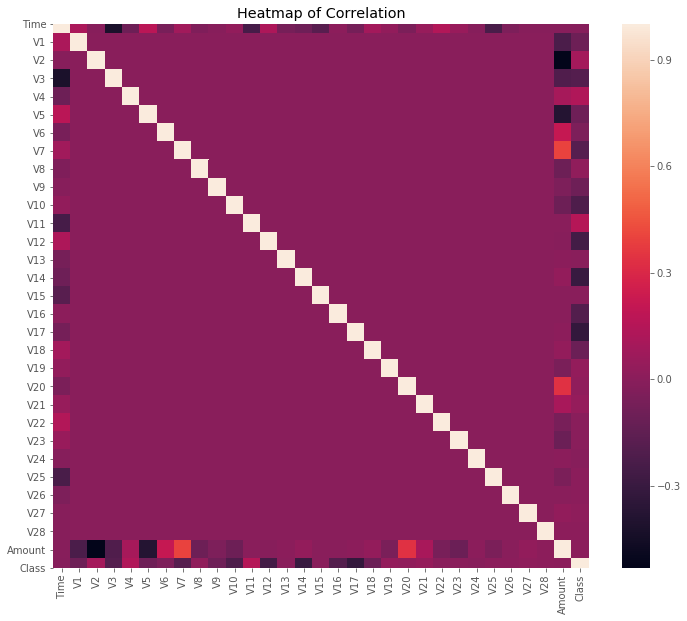

In [9]:
# heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [10]:
from sklearn.preprocessing import StandardScaler
df['normalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)
df = df.drop(['Time'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [11]:
# selection of Dependent and Independent Variable
X = df.iloc[:,df.columns != 'Class']
X.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475


In [12]:
y = df.iloc[:,df.columns == 'Class']
y.head(2)

,Class
0,0
1,0


In [0]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(199364, 29)
(85443, 29)
(199364, 1)
(85443, 1)


In [15]:
# RandomForest
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0 , n_estimators=100, criterion='entropy')
classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [16]:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
model_results = pd.DataFrame([['Random Forest(n=100)',acc,prec,rec,f1]],
                             columns=['Model','Accuracy','Precision','Recall','F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest(n=100),0.99952,0.941667,0.768707,0.846442


In [0]:
inp={'V1':-1.359807,'V2':-0.072781,'V3':-0.072781,'V4':2.536346,'V5':1.378155,'V6':-0.33832,'V7':0.462387,
     'V8':0.239598,'V9':0.098697,'V10':0.363786,'V11':0.090794,
       'V12':-0.551599,'V13':-0.617800,'V14':-0.991389,'V15':-0.311169,'V16':1.468176,'V17':-0.470400,
     'V18':0.207971,'V19':0.02579,'V20':0.40399,'V21':0.251412,
       'V22':-0.018306,'V23':0.277837,'V24':-0.11047,'V25':0.066928,'V26':0.128539,'V27':-0.189114,'V28':0.133558,
       'normalizedAmount':0.244964}
a_input=pd.DataFrame(inp,index=[0],columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'normalizedAmount']) 

In [18]:
pred = classifier.predict(a_input)
val = pred[0]
if val == 0:
  print ('Genuine')
else:
  print ('Fraudulent Transaction')

Genuine


In [0]:
# Taking User Input

V1 = float(input('Enter V1 : '))
V2 = float(input('Enter V2 : '))
V3 = float(input('Enter V3 : '))
V4 = float(input('Enter V4 : '))
V5 = float(input('Enter V5 : '))
V6 = float(input('Enter V6 : '))
V7 = float(input('Enter V7 : '))
V8 = float(input('Enter V8 : '))
V9 = float(input('Enter V9 : '))
V10 = float(input('Enter V10 : '))
V11 = float(input('Enter V11 : '))
V12 = float(input('Enter V12 : '))
V13 = float(input('Enter V13 : '))
V14 = float(input('Enter V14 : '))
V15 = float(input('Enter V15 : '))
V16 = float(input('Enter V16 : '))
V17 = float(input('Enter V17 : '))
V18 = float(input('Enter V18 : '))
V19 = float(input('Enter V19 : '))
V20 = float(input('Enter V20 : '))
V21 = float(input('Enter V21 : '))
V22 = float(input('Enter V22 : '))
V23 = float(input('Enter V23 : '))
V24 = float(input('Enter V24 : '))
V25 = float(input('Enter V25 : '))
V26 = float(input('Enter V26 : '))
V27 = float(input('Enter V27 : '))
V28 = float(input('Enter V28 : '))
normalizedAmount = float(input('Enter normalizedAmount : '))


# Convert UserInput into Dictionary 

inp={'V1':V1,'V2':V2,'V3':V3,'V4':V4,'V5':V5,'V6':V6,'V7':V7,
     'V8':V8,'V9':V9 ,'V10':V10,'V11':V11,
       'V12':V12,'V13':V13,'V14':V14,'V15':V15,'V16':V16,'V17':V17,
     'V18':V18,'V19':V19,'V20':V20,'V21':V21,
       'V22':V22,'V23':V23,'V24':V24,'V25':V25,'V26':V26,'V27':V27,'V28':V28,
       'normalizedAmount':normalizedAmount}

# Converting Dictionary into DataFrame 

user_input=pd.DataFrame(inp,index=[0],columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'normalizedAmount']) 

In [0]:
pred = classifier.predict(user_input)
val = pred[0]
if val == 0:
  print ('Genuine')
else:
  print ('Fraudulent Transaction')

In [0]:
#Let's see how our model performed using confusion matrix 

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
cm